<a href="https://colab.research.google.com/github/vanyaagarwal29/Feature-Enginering/blob/main/Techniques_of_handling_missing_value_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3.End of Distribution Imputation**

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


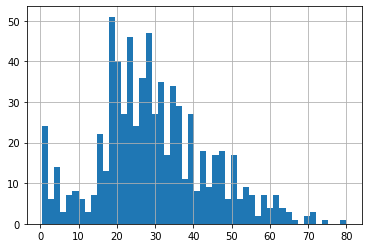

In [4]:
df.Age.hist(bins=50)

In [6]:
extremes=df.Age.mean()+3*df.Age.std()
extremes

73.27860964406094

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


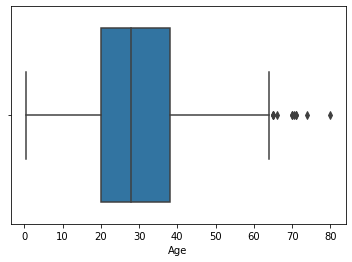

In [7]:
import seaborn as sns
sns.boxplot('Age', data=df)

In [8]:
def impute_NAN(df,variable,median,extremes):
  df[variable+"_end_distribution"]= df[variable].fillna(extremes)
  df[variable].fillna(median,inplace=True)

impute_NAN(df,'Age',df.Age.median(),extremes)
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


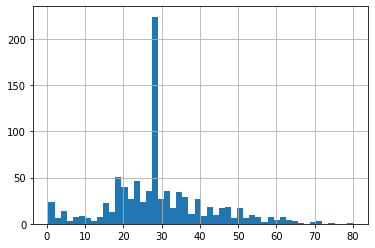

In [9]:
df['Age'].hist(bins=50)


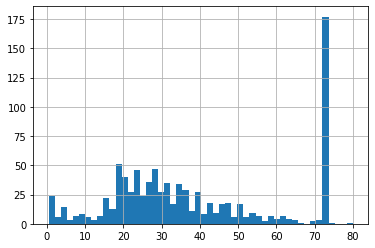

In [10]:
df['Age_end_distribution'].hist(bins=50)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


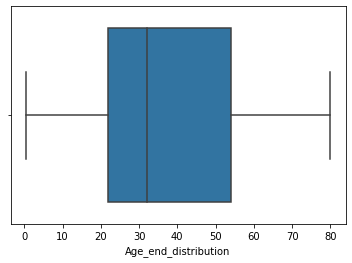

In [12]:
import seaborn as sns
sns.boxplot('Age_end_distribution', data=df)

Advantages
1. Easy to implement
2. Captures the importance of misisingess if there is one.

Disadvantages
1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predective power of the original variable by distorting its distribution
3. If the number of NA is big, it will mask true outliers in the distribution.
4. If the number of NA is small, the replaced NA may be considered an outlier and pr-processes in a subsequent feature engineering.

**4.Arbitary value imputation**

It consists of replacing NAN by an arbitary value.

In [3]:
df=pd.read_csv("titanic.csv", usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
def impute_NAN(df, variable):
  df[variable+'_hundred']=df.fillna(100)
  df[variable+'_zeros']=df.fillna(0)

Advantages

1. Easy to implement
2. Captures the importance of missingess if there is one

Disadvantages

1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
3. Hard to decide which value to use